<a href="https://colab.research.google.com/github/visahan1/Tensorflow/blob/main/FunctionalAPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:

#Functional API Tensorflow

#Use the Keras functional API to train a model to predict two outputs.
# **[Wine Quality Dataset]( )** from the **UCI machine learning repository**
# It has separate datasets for red wine and white wine.

#Normally, the wines are classified into one of the quality ratings specified in the attributes. 
#In this exercise, you will combine the two datasets to predict the wine quality and whether the wine is red or white solely from the attributes. 

#You will model wine quality estimations as a regression problem and wine type detection as a binary classification problem.



In [70]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
import itertools


In [53]:

red_df = pd.read_csv('./winequality-red.csv',sep=';')
red_df['is_red'] = 1
white_df = pd.read_csv('./winequality-white.csv',sep=';')
white_df['is_red'] = 0
white_df.head()
#Next, concatenate the red and white wine dataframes.
df = pd.concat([red_df, white_df], ignore_index=True)
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


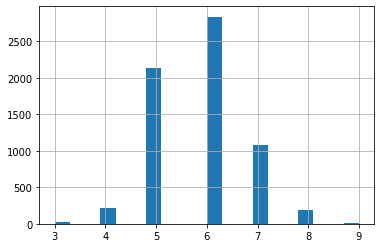

In [54]:
df['quality'].hist(bins=20)

In [55]:
  ## Since there are very few observations with quality equal to 3, 4, 8 and 9, you can drop these observations from your dataset. 
# get data with wine quality greater than 4 and less than 8
df = df[(df['quality'] > 4) & (df['quality'] < 8 )]

# reset index and drop the old one
df = df.reset_index(drop=True)
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [63]:
  # split df into 80:20 train and test sets
train, test = train_test_split(df, test_size=0.8, random_state = 1)
# split train into 80:20 train and val sets
train, val = train_test_split(train, test_size=0.8, random_state = 1)
def format_output(data):
    is_red = data.pop('is_red')
    is_red = np.array(is_red)
    quality = data.pop('quality')
    quality = np.array(quality)
    return (quality, is_red)

In [64]:
# format the output of the train set
train_Y = format_output(train)

# format the output of the val set
val_Y = format_output(val)
    
# format the output of the test set
test_Y = format_output(test)


In [69]:
train.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
2760,6.7,0.13,0.28,1.2,0.046,35.0,140.0,0.99270,3.33,0.33,10.1
1191,7.1,0.60,0.01,2.3,0.079,24.0,37.0,0.99514,3.40,0.61,10.9
3980,6.6,0.21,0.29,1.8,0.026,35.0,128.0,0.99183,3.37,0.48,11.2
3918,6.5,0.28,0.28,20.4,0.041,40.0,144.0,1.00020,3.14,0.38,8.7
3621,7.4,0.18,0.24,1.4,0.047,21.0,106.0,0.99383,3.52,0.64,10.5


In [71]:
scaler = StandardScaler()
scaled_train = scaler.fit_transform(train)

In [72]:
scaled_test = scaler.transform(test)

In [75]:
def base_model(inputs):
    
    # connect a Dense layer with 128 neurons and a relu activation
    x = Dense(units=128,activation='relu') (inputs)
    
    # connect another Dense layer with 128 neurons and a relu activation
    x = Dense(units=128,activation='relu') (x)
    return x